In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Draw inline
%matplotlib inline

# Set figure aesthetics
sns.set_style("white", {'ytick.major.size': 10.0})
sns.set_context("poster", font_scale=1.1)

c:\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
def preprocess_missing(df):
    ##AGE
    #Remove all ages outside of range, set to -1 for separate categorisation
    df.loc[df.age > 95, 'age'] = -1
    df.loc[df.age < 13, 'age'] = -1
    df.fillna(-1,inplace=True)

    ## GENDER
    # Set missing values to own category
    df['gender'].replace('-unknown-',np.nan, inplace=True)
    df['gender'].fillna('MISSING',inplace=True)

    ## FIRST AFFILIATE TRACKED
    # Set missing to untracked, hopefully the same
    df['first_affiliate_tracked'].fillna('untracked',inplace=True)
    
    ## Get rid of date_first_booking
    df.drop('date_first_booking',axis=1,inplace=True)
    
    return df

In [8]:
def preprocess_features(df):
    ## dates
    
    # date_account_created
    dac = np.vstack(df.date_account_created.astype(str).apply(lambda x: list(map(int, x.split('-')))).values)
    df['dac_year'] = dac[:,0]
    df['dac_month'] = dac[:,1]
    df['dac_day'] = dac[:,2]
    df.drop(['date_account_created'],axis=1,inplace=True)
    
    #time first active
    tfa = np.vstack(df.timestamp_first_active.astype(str).apply(lambda x: list(map(int, [x[:4],x[4:6],x[6:8],x[8:10],x[10:12],x[12:14]]))).values)
    df['tfa_year'] = tfa[:,0]
    df['tfa_month'] = tfa[:,1]
    df['tfa_day'] = tfa[:,2]
    df['tfa_hour'] = tfa[:,3]
    df.drop(['timestamp_first_active'],axis=1,inplace=True)
    
    
    ## One-Hot Encoding
    categorical_features = ['affiliate_channel','affiliate_provider','country_destination','first_affiliate_tracked',
                            'first_browser','first_device_type','gender','language','signup_app','signup_flow','signup_method'
                           ]
    
    df = pd.get_dummies(df,columns=categorical_features)
    
    return df
    

In [4]:
def preprocess_all(df):

    df_p = preprocess_missing(df)
    df_p = preprocess_features(df_p)
    
    return(df_p)

In [5]:
# Load data into DataFrames
train_users = pd.read_csv('input/train_users_2.csv')
test_users = pd.read_csv('input/test_users.csv')

In [6]:
train_users = preprocess_all(train_users)

In [9]:
df.head()

id  age  dac_year  dac_month  dac_day  tfa_year  tfa_month  \
0  gxn3p5htnn   -1      2010          6       28      2009          3   
1  820tgsjxq7   38      2011          5       25      2009          5   
2  4ft3gnwmtx   56      2010          9       28      2009          6   
3  bjjt8pjhuk   42      2011         12        5      2009         10   
4  87mebub9p4   41      2010          9       14      2009         12   

   tfa_day  tfa_hour  affiliate_channel_api          ...           \
0       19         4                      0          ...            
1       23        17                      0          ...            
2        9        23                      0          ...            
3       31         6                      0          ...            
4        8         6                      0          ...            

   signup_flow_15  signup_flow_16  signup_flow_20  signup_flow_21  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   signup_flow_23  signup_flow_24  signup_flow_25  signup_method_basic  \
0               0               0               0                    0   
1               0               0               0                    0   
2               0               0               0                    1   
3               0               0               0                    0   
4               0               0               0                    1   

   signup_method_facebook  signup_method_google  
0                       1                     0  
1                       1                     0  
2                       0                     0  
3                       1                     0  
4                       0                     0  

[5 rows x 169 columns]

## PREPROCESS DATES

In [ ]:
dac = np.vstack(df.date_account_created.astype(str).apply(lambda x: list(map(int, x.split('-')))).values)
df['dac_year'] = dac[:,0]
df['dac_month'] = dac[:,1]
df['dac_day'] = dac[:,2]
df.drop(['date_account_created'],axis=1,inplace=True)

In [ ]:
tfa = np.vstack(df.timestamp_first_active.astype(str).apply(lambda x: list(map(int, [x[:4],x[4:6],x[6:8],x[8:10],x[10:12],x[12:14]]))).values)
df['tfa_year'] = tfa[:,0]
df['tfa_month'] = tfa[:,1]
df['tfa_day'] = tfa[:,2]
df['tfa_hour'] = tfa[:,3]
df.drop(['timestamp_first_active'],axis=1,inplace=True)

## One-Hot Encoding of Categorical Features

In [ ]:
categorical_features = [
    'affiliate_channel',
    'affiliate_provider',
    'country_destination',
    'first_affiliate_tracked',
    'first_browser',
    'first_device_type',
    'gender',
    'language',
    'signup_app',
    'signup_flow',
    'signup_method'
]

#for categorical_feature in categorical_features:
#    users[categorical_feature] = users[categorical_feature].astype('category')

In [ ]:
df = pd.get_dummies(df,columns=categorical_features)

In [ ]:
df.sum()

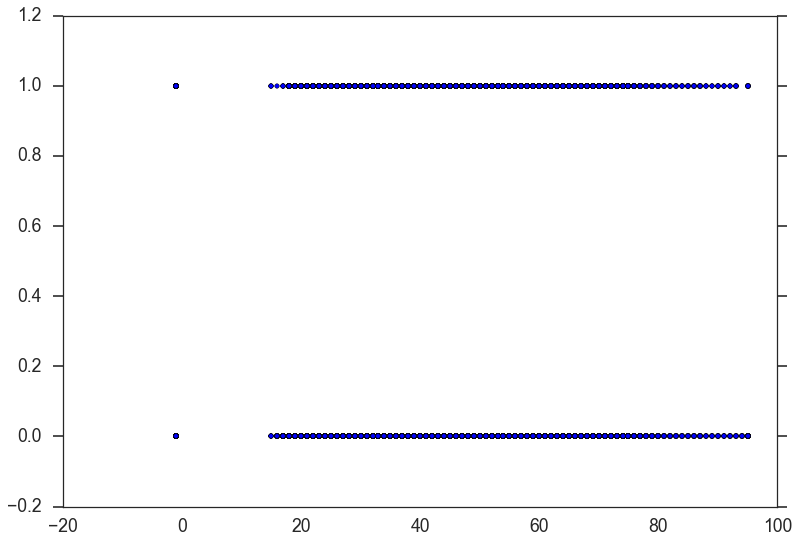

In [13]:
plt.scatter(df.age,train_users.country_destination!="NDF")

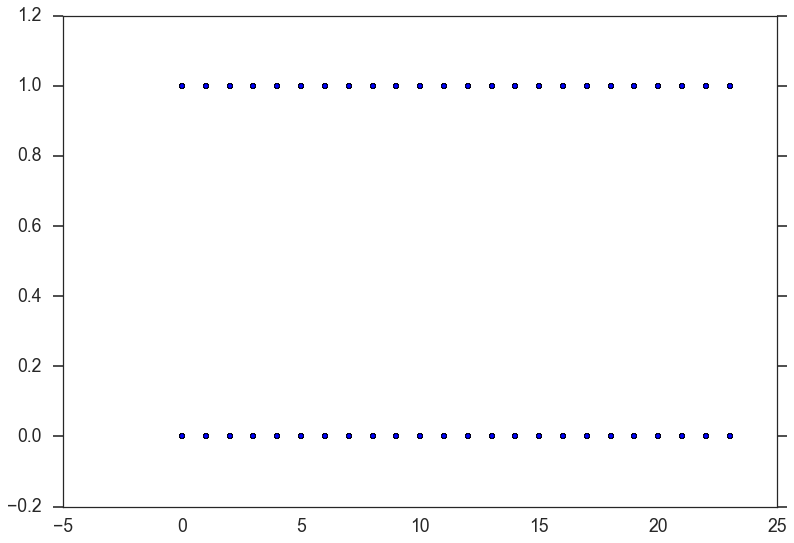

In [12]:
plt.scatter(df.tfa_hour,train_users.country_destination!="NDF")